In [1]:
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ipywidgets import interact
from sklearn.preprocessing import MinMaxScaler
from math import log
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier 
from sklearn.model_selection import cross_validate


C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Description of data

##Attribute Information

1) gender: "Male", "Female" or "Other"


2) age: age of the patient


3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension


4) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease


5) ever_married: "No" or "Yes"


6) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"


7) Residence_type: "Rural" or "Urban"


8) avg_glucose_level: average glucose level in blood


9) bmi: body mass index


10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*


11) stroke: 1 if the patient had a stroke or 0 if not



*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

[Real data sources](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9264165)

In [3]:
raw_data=pd.read_csv(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\new_data\full_data.csv")

In [4]:
raw_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
raw_data.shape

(4981, 11)

In [6]:
raw_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# Encodage

In [9]:
df_raw_encoding=pd.read_csv("data_encoder")

In [10]:
df_raw_encoding.head()

,Unnamed: 0,gender,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
0,0,1,1,0,0,0,67.0,228.69,36.6,0,1,1
1,1,1,1,0,1,1,80.0,105.92,32.5,0,1,1
2,2,0,1,0,0,2,49.0,171.23,34.4,0,0,1
3,3,0,1,1,1,1,79.0,174.12,24.0,1,0,1
4,4,1,1,0,0,0,81.0,186.21,29.0,0,0,1


In [13]:
df_raw_encoding.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [14]:
df_raw_encoding.shape

(4981, 11)

In [15]:
df_raw_encoding.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
0,1,1,0,0,0,67.0,228.69,36.6,0,1,1
1,1,1,0,1,1,80.0,105.92,32.5,0,1,1
2,0,1,0,0,2,49.0,171.23,34.4,0,0,1
3,0,1,1,1,1,79.0,174.12,24.0,1,0,1
4,1,1,0,0,0,81.0,186.21,29.0,0,0,1


In [16]:
df_raw_encoding.skew()

gender               0.339351
ever_married        -0.668689
work_type            0.955789
Residence_type       0.033341
smoking_status       0.077397
age                 -0.144001
avg_glucose_level    1.587526
bmi                  0.371553
hypertension         2.740377
heart_disease        3.896191
stroke               4.140942
dtype: float64

# Scaling

In [42]:
df_raw_scaled=pd.DataFrame()
value_tobe_scaled=pd.DataFrame()

for col in raw_data.select_dtypes('float64'):
    value_tobe_scaled[col] = df_raw_encoding[col] 

In [43]:
value_tobe_scaled.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0


In [44]:
# Nos donnees ne sont pas a la meme echelle. Ceci pourrait poser un probleme lors de la modelisation nous allons procedons a une standardisation

scaler_=MinMaxScaler()
df_raw_scaled=scaler_.fit_transform(value_tobe_scaled)

In [45]:
df_raw_scaled=pd.DataFrame(df_raw_scaled, columns=['age',' avg_glucose_level', 'bmi'])

In [46]:
for col in df_raw_encoding.select_dtypes('int64'):
    #print(col)
    df_raw_scaled[col]=df_raw_encoding[col]
    

gender
ever_married
work_type
Residence_type
smoking_status
hypertension
heart_disease
stroke


In [47]:
df_raw_scaled

,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,0.816895,0.801265,0.647564,1,1,0,0,0,0,1,1
1,0.975586,0.234512,0.530086,1,1,0,1,1,0,1,1
2,0.597168,0.536008,0.584527,0,1,0,0,2,0,0,1
3,0.963379,0.549349,0.286533,0,1,1,1,1,1,0,1
4,0.987793,0.605161,0.429799,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,0.499512,0.069384,0.452722,1,0,0,1,0,0,0,0
4977,0.487305,0.627966,0.489971,1,1,0,0,2,0,0,0
4978,0.548340,0.184194,0.510029,0,1,2,1,2,1,0,0
4979,0.487305,0.133044,0.458453,1,1,0,1,2,0,0,0


# Separation

In [48]:
seed=1000
y=df_raw_scaled['stroke']
X=df_raw_scaled.drop('stroke', axis=1)

In [49]:
X.shape

(4981, 10)

In [50]:
y.shape

(4981,)

In [51]:
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

In [52]:
X_test,X_val, y_test,y_val= train_test_split(X_test,y_test,test_size=0.5,random_state=seed,stratify=y_test)

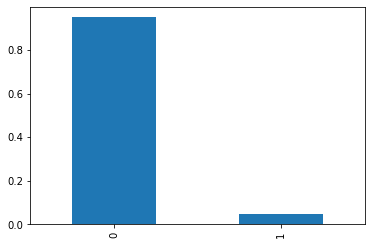

In [56]:
y_test.value_counts(normalize=True).plot(kind='bar')

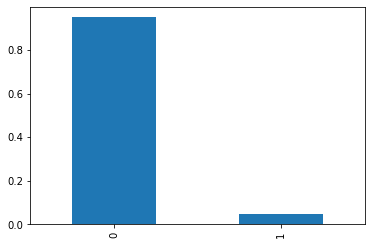

In [57]:
y_train.value_counts(normalize=True).plot(kind='bar')

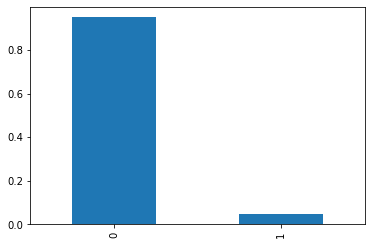

In [58]:
y_val.value_counts(normalize=True).plot(kind='bar')

# Baseline

## Dummy Classifier

In [62]:
dummy_model=DummyClassifier(strategy='stratified')
dummy_model.fit(X_train,y_train)
dummy_model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
dummy_model.score(X_train,y_train)

0.9059093516924842

In [77]:
print(classification_report(y_val,dummy_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       711
           1       0.03      0.03      0.03        37

    accuracy                           0.91       748
   macro avg       0.49      0.49      0.49       748
weighted avg       0.90      0.91      0.91       748



In [78]:
print(classification_report(y_test,dummy_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       710
           1       0.03      0.03      0.03        37

    accuracy                           0.91       747
   macro avg       0.49      0.49      0.49       747
weighted avg       0.90      0.91      0.91       747



## Random Classifier

In [80]:
rdf_base=RandomForestClassifier()
rdf_base.fit(X_train,y_train)
print(classification_report(y_val,rdf_base.predict(X_val)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       711
           1       0.20      0.03      0.05        37

    accuracy                           0.95       748
   macro avg       0.58      0.51      0.51       748
weighted avg       0.91      0.95      0.93       748



In [86]:
rdf_base

RandomForestClassifier()

# Feature Engineering

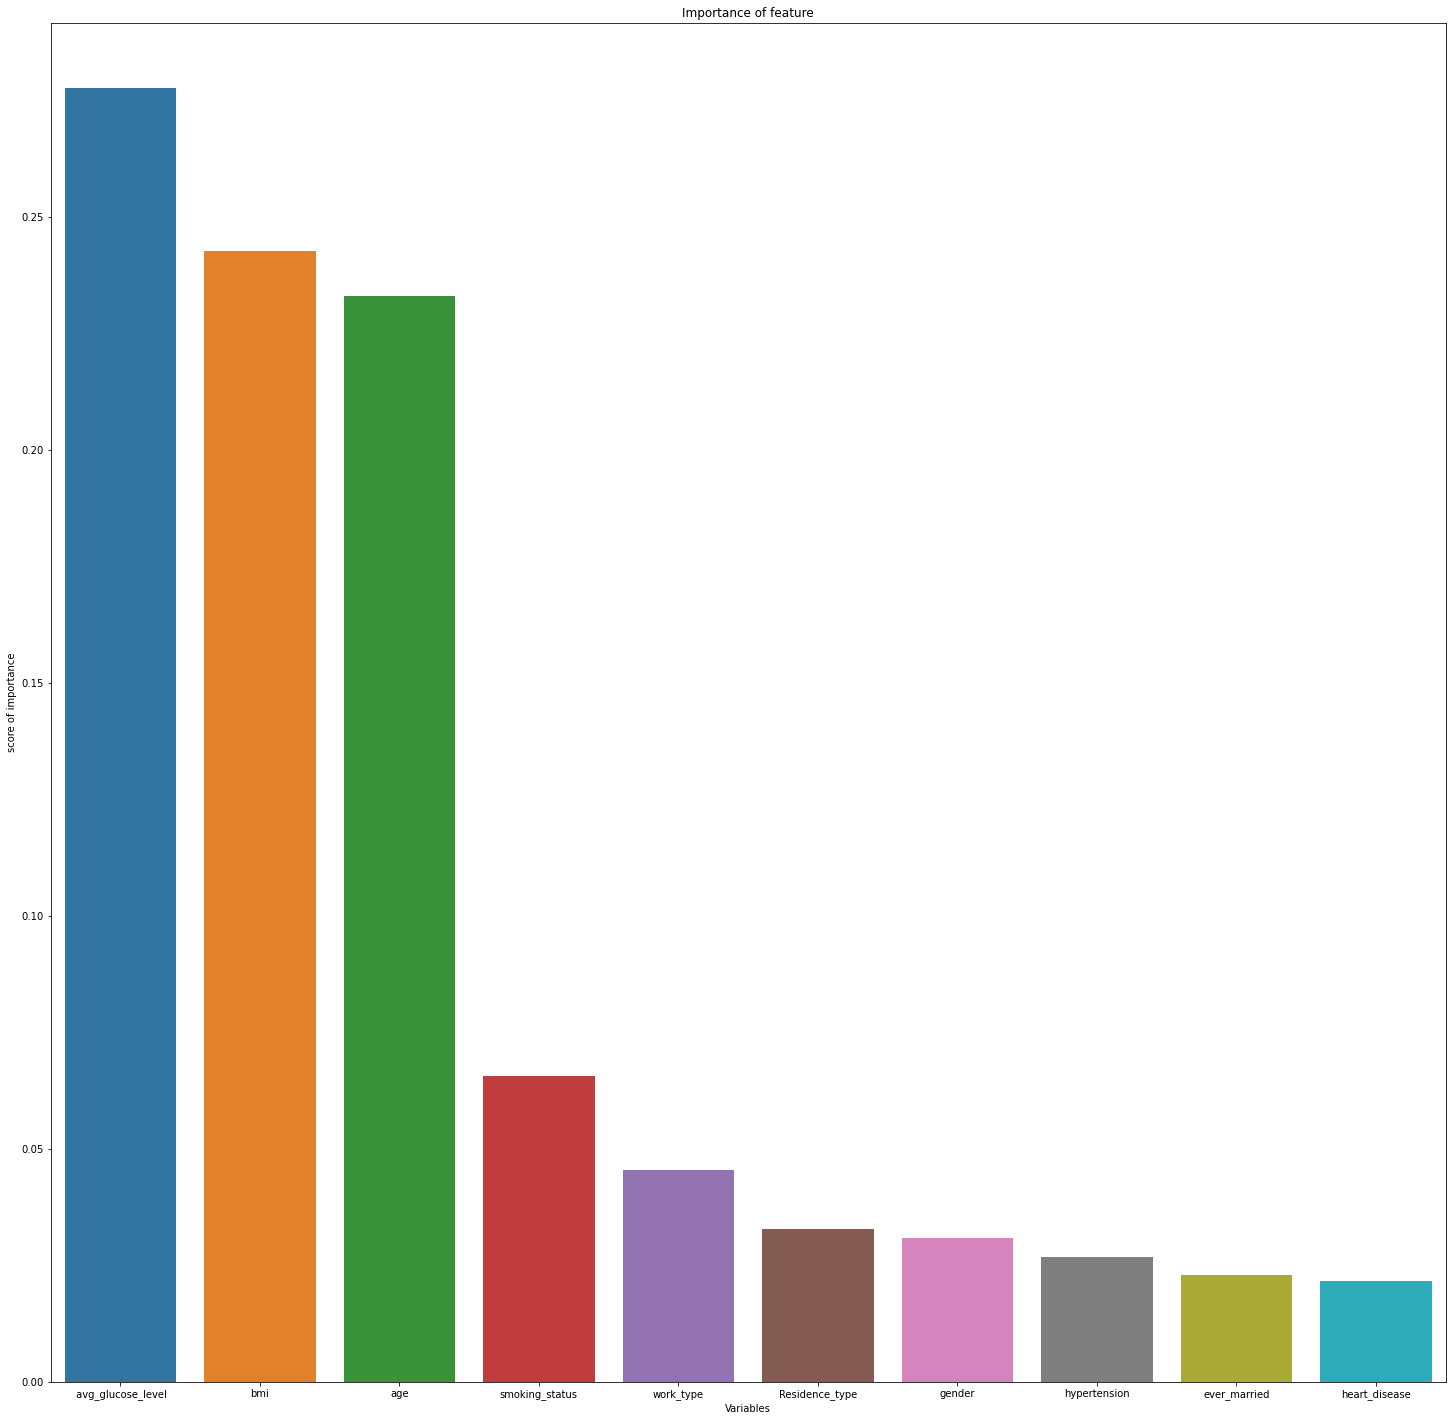

In [81]:
# Importance des variables
plt.figure(figsize=(25,25))
features_important=pd.Series(rdf_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sn.barplot(x=features_important.index, y=features_important)
plt.xlabel("Variables")
plt.ylabel("score of importance")
plt.title("Importance of feature")
plt.show()


In [89]:
features_important

 avg_glucose_level    0.277749
bmi                   0.242658
age                   0.233136
smoking_status        0.065562
work_type             0.045572
Residence_type        0.032867
gender                0.030910
hypertension          0.026897
ever_married          0.022947
heart_disease         0.021701
dtype: float64

In [92]:
features_selected=features_important[features_important>0.03].index.to_list()

In [94]:
X_train_selected=X_train[features_selected]

In [97]:

X_test_selected=X_test[features_selected]
X_val_selected=X_val[features_selected]

# Raw data model

## Random Classifier

In [111]:
param_grid={'n_estimators' : [10,20,30,40,50,60,70,80,90,100,500,1000],
           'max_depth' : [2,4,3,5,7,8,9,10,11,12,20, None]}

grid_rdf_class_=GridSearchCV(estimator=RandomForestClassifier(random_state=seed), param_grid=param_grid,scoring='f1',cv=5)

rdf_model_=grid_rdf_class_.fit(X_train,y_train)

#best score
print(round(rdf_model_.best_score_,3))
print(rdf_model_.best_estimator_)
evaluation_model(grid_rdf_class_,X_val,y_val)

0.052
RandomForestClassifier(max_depth=11, n_estimators=20, random_state=1000)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       711
           1       0.17      0.03      0.05        37

    accuracy                           0.95       748
   macro avg       0.56      0.51      0.51       748
weighted avg       0.91      0.95      0.93       748



In [109]:
X_val.shape

(748, 10)

## Lostistic Regression

In [112]:
param_grid={'C' : [0.001, 0.001, 1, 10, 50,100, 500]}
grid_logistreg_class=GridSearchCV(estimator=LogisticRegression (random_state=seed, max_iter=500), param_grid=param_grid,scoring='f1',cv=5)

logistreg_model=grid_logistreg_class.fit(X_train, y_train)

#best score
print(round(logistreg_model.best_score_,3))
print(logistreg_model.best_estimator_)
evaluation_model(logistreg_model,X_val,y_val)

0.0
LogisticRegression(C=0.001, max_iter=500, random_state=1000)
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       711
           1       0.00      0.00      0.00        37

    accuracy                           0.95       748
   macro avg       0.48      0.50      0.49       748
weighted avg       0.90      0.95      0.93       748



C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  false negatives and false positives.


In [87]:
def evaluation_model(model,features,label) :
    pred=model.predict(features)
    print(classification_report(label,pred))

In [88]:
evaluation_model(grid_rdf_class,X_val,y_val)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       711
           1       0.17      0.03      0.05        37

    accuracy                           0.95       748
   macro avg       0.56      0.51      0.51       748
weighted avg       0.91      0.95      0.93       748



# Modelisation with 6 var 

## Random Forest

In [98]:
param_grid={'n_estimators' : [10,20,30,40,50,60,70,80,90,100,500,1000],
           'max_depth' : [2,4,3,5,7,8,9,10,11,12,20, None]}

grid_rdf_class=GridSearchCV(estimator=RandomForestClassifier(random_state=seed), param_grid=param_grid,scoring='f1',cv=5)

rdf_model=grid_rdf_class.fit(X_train_selected,y_train)

#best score
print(round(rdf_model.best_score_,3))
print(rdf_model.best_estimator_)
evaluation_model(grid_rdf_class,X_val_selected,y_val)

0.02
RandomForestClassifier(max_depth=11, n_estimators=10, random_state=1000)
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       711
           1       0.50      0.03      0.05        37

    accuracy                           0.95       748
   macro avg       0.73      0.51      0.51       748
weighted avg       0.93      0.95      0.93       748



## Logistic Regression

In [113]:
param_grid={'C' : [0.001, 0.001, 1, 10, 50,100, 500]}
logist_reg_=GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=500), param_grid=param_grid,scoring='f1',cv=5 )
logist_reg_=logist_reg_.fit(X_train_selected,y_train)
#best score
print(round(logist_reg_.best_score_,3))
print(logist_reg_.best_estimator_)
evaluation_model(logist_reg_,X_val_selected,y_val)

0.0
LogisticRegression(C=0.001, max_iter=500, random_state=1000)
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       711
           1       0.00      0.00      0.00        37

    accuracy                           0.95       748
   macro avg       0.48      0.50      0.49       748
weighted avg       0.90      0.95      0.93       748



C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  false negatives and false positives.


# Modelisation with 3 var 

## Random Classifier

In [104]:
selected_var=features_important[features_important>0.07].index.to_list()

In [105]:
selected_var

[' avg_glucose_level', 'bmi', 'age']

In [106]:
X_3=X_train[selected_var]
X_test3=X_test[selected_var]
X_val3=X_val[selected_var]

In [107]:
param_grid={'n_estimators' : [10,20,30,40,50,60,70,80,90,100,500,1000],
           'max_depth' : [2,4,3,5,7,8,9,10,11,12,20, None]}

grid_rdf_class=GridSearchCV(estimator=RandomForestClassifier(random_state=seed), param_grid=param_grid,scoring='f1',cv=5)

rdf_model=grid_rdf_class.fit(X_3,y_train)

#best score
print(round(rdf_model.best_score_,3))
print(rdf_model.best_estimator_)
evaluation_model(grid_rdf_class,X_val3,y_val)

0.068
RandomForestClassifier(n_estimators=10, random_state=1000)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       711
           1       0.17      0.03      0.05        37

    accuracy                           0.95       748
   macro avg       0.56      0.51      0.51       748
weighted avg       0.91      0.95      0.93       748



## Logistic Regression

In [114]:

param_grid={'C' : [0.001, 0.001, 1, 10, 50,100, 500]}
logist_reg_3=GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=500), param_grid=param_grid,scoring='f1',cv=5 )
logist_reg_3=logist_reg_.fit(X_3,y_train)
#best score
print(round(logist_reg_3.best_score_,3))
print(logist_reg_3.best_estimator_)
evaluation_model(logist_reg_3,X_val3,y_val)

0.0
LogisticRegression(C=0.001, max_iter=500, random_state=1000)
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       711
           1       0.00      0.00      0.00        37

    accuracy                           0.95       748
   macro avg       0.48      0.50      0.49       748
weighted avg       0.90      0.95      0.93       748



C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  false negatives and false positives.
